In [1]:
import pandas as pd
import numpy as np

Leamos los datos (pero esta vez,  entreguemos los *types* en el comando)

In [2]:
dataTrips = pd.read_csv("data/trips_new.csv", dtype={'id': 'int64', 'duration': 'float64', 'start_date': 'object', 'start_station': 'category', 'end_date': 'object', 'end_station': 'category', 'bike_nr': 'category', 'subscription_type': 'category', 'zip_code': 'category', 'birth_date': 'float64', 'gender': 'category'})


In [4]:
dataTrips

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
0,8,9.0,2011-07-28T10:12:00.04,23,2011-07-28T10:12:00.04,23,B00468,Registered,97217,1976.0,Male
1,9,220.0,2011-07-28T10:21:00.04,23,2011-07-28T10:25:00.04,23,B00554,Registered,02215,1966.0,Male
2,10,56.0,2011-07-28T10:33:00.04,23,2011-07-28T10:34:00.04,23,B00456,Registered,02108,1943.0,Male
3,11,64.0,2011-07-28T10:35:00.04,23,2011-07-28T10:36:00.04,23,B00554,Registered,02116,1981.0,Female
4,12,12.0,2011-07-28T10:37:00.04,23,2011-07-28T10:37:00.04,23,B00554,Registered,97214,1983.0,Female
...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,527.0,2012-10-01T20:24:00.04,46,2012-10-01T20:32:00.04,67,B00486,Casual,NaN,NaN,NaN
552069,623508,226.0,2012-10-01T20:24:00.04,25,2012-10-01T20:28:00.04,26,B00170,Registered,02118,1986.0,Male
552070,623509,535.0,2012-10-01T20:25:00.04,16,2012-10-01T20:34:00.04,47,T01067,Registered,02113,1965.0,Male
552071,623512,429.0,2012-10-01T20:29:00.04,61,2012-10-01T20:36:00.04,33,B00621,Registered,02135,1986.0,Male


In [6]:
dataTrips['start_date']=dataTrips['start_date'].astype('datetime64[ns]')
dataTrips['end_date']=dataTrips['end_date'].astype('datetime64[ns]')

In [7]:
dataTrips

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
0,8,9.0,2011-07-28 10:12:00.040,23,2011-07-28 10:12:00.040,23,B00468,Registered,97217,1976.0,Male
1,9,220.0,2011-07-28 10:21:00.040,23,2011-07-28 10:25:00.040,23,B00554,Registered,02215,1966.0,Male
2,10,56.0,2011-07-28 10:33:00.040,23,2011-07-28 10:34:00.040,23,B00456,Registered,02108,1943.0,Male
3,11,64.0,2011-07-28 10:35:00.040,23,2011-07-28 10:36:00.040,23,B00554,Registered,02116,1981.0,Female
4,12,12.0,2011-07-28 10:37:00.040,23,2011-07-28 10:37:00.040,23,B00554,Registered,97214,1983.0,Female
...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,527.0,2012-10-01 20:24:00.040,46,2012-10-01 20:32:00.040,67,B00486,Casual,NaN,NaN,NaN
552069,623508,226.0,2012-10-01 20:24:00.040,25,2012-10-01 20:28:00.040,26,B00170,Registered,02118,1986.0,Male
552070,623509,535.0,2012-10-01 20:25:00.040,16,2012-10-01 20:34:00.040,47,T01067,Registered,02113,1965.0,Male
552071,623512,429.0,2012-10-01 20:29:00.040,61,2012-10-01 20:36:00.040,33,B00621,Registered,02135,1986.0,Male


Terminamos de ajustar los datos: duración en minutos,  sin errores en las estaciones, y viajes menores a 24 horas.

In [8]:
dataTrips['duration']=dataTrips['duration']/60

In [12]:
sum(dataTrips['start_station'].isnull())

15

In [13]:
sum(dataTrips['end_station'].isnull())

45

In [14]:
finalData=dataTrips.dropna(subset=['start_station', 'end_station'])


In [15]:
finalData

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
0,8,0.150000,2011-07-28 10:12:00.040,23,2011-07-28 10:12:00.040,23,B00468,Registered,97217,1976.0,Male
1,9,3.666667,2011-07-28 10:21:00.040,23,2011-07-28 10:25:00.040,23,B00554,Registered,02215,1966.0,Male
2,10,0.933333,2011-07-28 10:33:00.040,23,2011-07-28 10:34:00.040,23,B00456,Registered,02108,1943.0,Male
3,11,1.066667,2011-07-28 10:35:00.040,23,2011-07-28 10:36:00.040,23,B00554,Registered,02116,1981.0,Female
4,12,0.200000,2011-07-28 10:37:00.040,23,2011-07-28 10:37:00.040,23,B00554,Registered,97214,1983.0,Female
...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46,2012-10-01 20:32:00.040,67,B00486,Casual,NaN,NaN,NaN
552069,623508,3.766667,2012-10-01 20:24:00.040,25,2012-10-01 20:28:00.040,26,B00170,Registered,02118,1986.0,Male
552070,623509,8.916667,2012-10-01 20:25:00.040,16,2012-10-01 20:34:00.040,47,T01067,Registered,02113,1965.0,Male
552071,623512,7.150000,2012-10-01 20:29:00.040,61,2012-10-01 20:36:00.040,33,B00621,Registered,02135,1986.0,Male


In [16]:
finalData.describe()

,id,duration,birth_date
count,552020.000000,552020.000000,352930.000000
mean,312916.785448,25.841395,1976.294223
std,180084.792795,477.967443,11.003620
min,8.000000,0.000000,1932.000000
25%,154979.750000,6.850000,1969.000000
50%,315383.500000,11.450000,1979.000000
75%,468506.250000,20.066667,1985.000000
max,623517.000000,199907.633333,1995.000000


In [17]:
finalData = finalData[finalData['duration']<24*60]

In [18]:
finalData

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
0,8,0.150000,2011-07-28 10:12:00.040,23,2011-07-28 10:12:00.040,23,B00468,Registered,97217,1976.0,Male
1,9,3.666667,2011-07-28 10:21:00.040,23,2011-07-28 10:25:00.040,23,B00554,Registered,02215,1966.0,Male
2,10,0.933333,2011-07-28 10:33:00.040,23,2011-07-28 10:34:00.040,23,B00456,Registered,02108,1943.0,Male
3,11,1.066667,2011-07-28 10:35:00.040,23,2011-07-28 10:36:00.040,23,B00554,Registered,02116,1981.0,Female
4,12,0.200000,2011-07-28 10:37:00.040,23,2011-07-28 10:37:00.040,23,B00554,Registered,97214,1983.0,Female
...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46,2012-10-01 20:32:00.040,67,B00486,Casual,NaN,NaN,NaN
552069,623508,3.766667,2012-10-01 20:24:00.040,25,2012-10-01 20:28:00.040,26,B00170,Registered,02118,1986.0,Male
552070,623509,8.916667,2012-10-01 20:25:00.040,16,2012-10-01 20:34:00.040,47,T01067,Registered,02113,1965.0,Male
552071,623512,7.150000,2012-10-01 20:29:00.040,61,2012-10-01 20:36:00.040,33,B00621,Registered,02135,1986.0,Male


In [19]:
finalData['duration'].mean()

21.616271490839257

# Ejercicio:
Hubway cobra basado en la duración del viaje. Usuarios *Casual* pagan `$0` si el viaje dura menos de 30 minutos, `$2` si dura entre 30 y 60 minutos, y `$6` para viajes entre 60 a 90 minutos. Por cada 30 minutos adicionales, se cobran `$8` adicionales, con un máximo de `$100`.   Un usuario *Registered* para el 75\% de la tarifa solamente (con un máximo de `$75`, por lo tanto). 

Casual:
- [0 - 30] : 0
- [30 - 59] : 2
- [60 - 89] : 6
- [90 - 119] : 14 (6+8)
- [120 - 149] : 22 (6+8+8)

Hasta $100 máximo

Registered: solo 75% del valor.


**Ejercicio**: Agregue una columna `fee` que indique cuanto se cobró en cada viaje.

**Ejercicio 2**: calcule fueron los ingresos por cada tipo de usuario, y también calcule los ingresos de cada año.

In [26]:
(120 - 90)//30 +1

2

In [27]:
def pago(duracion):
    if duracion <= 30:
        costo = 0
    elif duracion <= 60:
        costo = 2
    elif duracion <= 90:
        costo = 6
    else:
        num_medias_horas_extras  = (duracion-90)//30 + 1
        costo = 6 + 8*num_medias_horas_extras
    
    if costo >= 100:
        costo = 100
    
    return costo

In [34]:
finalData['payment'] = finalData['duration'].apply(pago)

<ipython-input-34-4cddacfebcce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['payment'] = finalData['duration'].apply(pago)


In [42]:
def pago(x):
    duracion = x['duration']
    tipo_subs = x['subscription_type']
    
    if duracion <= 30:
        costo = 0
    elif duracion <= 60:
        costo = 2
    elif duracion <= 90:
        costo = 6
    else:
        num_medias_horas_extras  = (duracion-90)//30 + 1
        costo = 6 + 8*num_medias_horas_extras
    
    if costo >= 100:
        costo = 100
        
    if tipo_subs == "Registered":
        costo = costo * 0.75
    
    return costo

In [44]:
finalData['payment'] = finalData.apply(pago, axis=1)

<ipython-input-44-2d434b62b860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['payment'] = finalData.apply(pago, axis=1)


In [45]:
finalData

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,payment
0,8,0.150000,2011-07-28 10:12:00.040,23,2011-07-28 10:12:00.040,23,B00468,Registered,97217,1976.0,Male,0.0
1,9,3.666667,2011-07-28 10:21:00.040,23,2011-07-28 10:25:00.040,23,B00554,Registered,02215,1966.0,Male,0.0
2,10,0.933333,2011-07-28 10:33:00.040,23,2011-07-28 10:34:00.040,23,B00456,Registered,02108,1943.0,Male,0.0
3,11,1.066667,2011-07-28 10:35:00.040,23,2011-07-28 10:36:00.040,23,B00554,Registered,02116,1981.0,Female,0.0
4,12,0.200000,2011-07-28 10:37:00.040,23,2011-07-28 10:37:00.040,23,B00554,Registered,97214,1983.0,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46,2012-10-01 20:32:00.040,67,B00486,Casual,NaN,NaN,NaN,0.0
552069,623508,3.766667,2012-10-01 20:24:00.040,25,2012-10-01 20:28:00.040,26,B00170,Registered,02118,1986.0,Male,0.0
552070,623509,8.916667,2012-10-01 20:25:00.040,16,2012-10-01 20:34:00.040,47,T01067,Registered,02113,1965.0,Male,0.0
552071,623512,7.150000,2012-10-01 20:29:00.040,61,2012-10-01 20:36:00.040,33,B00621,Registered,02135,1986.0,Male,0.0


In [50]:
finalData.groupby('subscription_type')['payment'].sum()

subscription_type
Casual        651780.0
Registered     52692.0
Name: payment, dtype: float64

In [51]:
finalData.groupby('subscription_type')['payment'].mean()

subscription_type
Casual        3.324662
Registered    0.148191
Name: payment, dtype: float64

In [55]:
finalData.groupby(finalData['start_date'].dt.year)['payment'].sum()

start_date
2011    392714.0
2012    311758.0
Name: payment, dtype: float64

In [56]:
finalData.groupby(['subscription_type', finalData['start_date'].dt.year])['payment'].sum()

subscription_type  start_date
Casual             2011          370328.0
                   2012          281452.0
Registered         2011           22386.0
                   2012           30306.0
Name: payment, dtype: float64

In [70]:
finalData.groupby('start_date')['payment'].sum()

start_date
2011-07-28 10:12:00.040    0.0
2011-07-28 10:21:00.040    0.0
2011-07-28 10:33:00.040    0.0
2011-07-28 10:35:00.040    0.0
2011-07-28 10:37:00.040    0.0
                          ... 
2012-10-01 20:22:00.040    0.0
2012-10-01 20:24:00.040    0.0
2012-10-01 20:25:00.040    0.0
2012-10-01 20:29:00.040    0.0
2012-10-01 20:32:00.040    0.0
Name: payment, Length: 234953, dtype: float64

In [71]:
finalData.groupby(finalData['start_date'])['payment'].sum()

start_date
2011-07-28 10:12:00.040    0.0
2011-07-28 10:21:00.040    0.0
2011-07-28 10:33:00.040    0.0
2011-07-28 10:35:00.040    0.0
2011-07-28 10:37:00.040    0.0
                          ... 
2012-10-01 20:22:00.040    0.0
2012-10-01 20:24:00.040    0.0
2012-10-01 20:25:00.040    0.0
2012-10-01 20:29:00.040    0.0
2012-10-01 20:32:00.040    0.0
Name: payment, Length: 234953, dtype: float64

## Repaso

Lo que vimos la clase pasada es el paradigma de *split-apply-combine*:
        

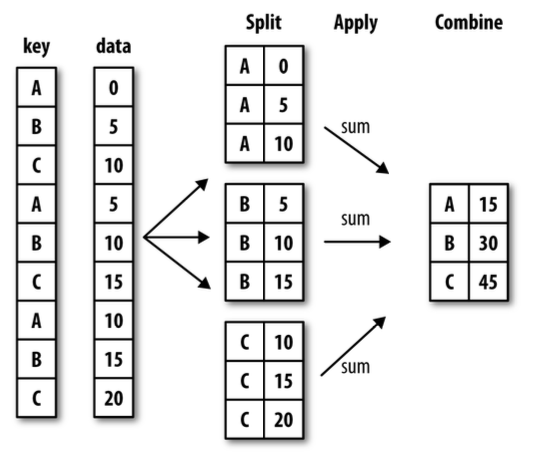

Esto lo hacemos con el comando `<dataframe>.groupby(<forma_agrupar>).apply(<funciona_a_aplicar>)`

**PREGUNTA 2**: ¿Cuál es el total de minutos por `gender`?

In [48]:
finalData.groupby('gender')['duration'].sum()

gender
Female    1.189086e+06
Male      2.979078e+06
Name: duration, dtype: float64

**Pregunta**: ¿Cuál es la duración promedio de los mayores/menores de 42 años?  (nacidos <=/> 1979)

In [84]:
tmp = (finalData['birth_date']<=1979)
finalData.groupby(tmp)['duration'].mean()

birth_date
False    26.263470
True     11.824613
Name: duration, dtype: float64

In [85]:
tmp = (finalData['birth_date']<=1979)
finalData.groupby(['subscription_type',tmp])['duration'].mean()

subscription_type  birth_date
Casual             False         39.560557
                   True                NaN
Registered         False         11.620833
                   True          11.824613
Name: duration, dtype: float64

In [88]:
tmp = finalData[finalData['subscription_type']=='Registered']['birth_date']<=1979
finalData[finalData['subscription_type']=='Registered'].groupby(tmp)['duration'].mean()

birth_date
False    11.620833
True     11.824613
Name: duration, dtype: float64

**Ejercicio**: La empresa tiene una tarifa distinta para aquellos viajes que duran mas de media hora.   Por eso, Calcule la proporción de viajes desde cada estación de inicio (*start_station*) que duran mas de 30 minutos. 

In [94]:
def prop_menos_30(duration):
    num_menos_30 = sum(duration<=30)
    total = len(duration)
    return num_menos_30/total

In [93]:
sum(finalData['duration']<= 30)/len(finalData['duration'])

0.878459639129749

In [95]:
prop_menos_30(finalData['duration'])

0.878459639129749

In [96]:
finalData.groupby('start_station')['duration'].apply(prop_menos_30)

start_station
10    0.905792
11    0.932901
12    0.913983
13    0.933980
14    0.957670
        ...   
94    0.875486
95    0.930403
96    0.919028
97    0.743590
98    0.838290
Name: duration, Length: 95, dtype: float64

In [101]:
sum(finalData[finalData['start_station']=='10']['duration']<= 30)/len(finalData[finalData['start_station']=='10']['duration'])

0.9057921402163495

In [102]:
finalData['bike_nr']

0         B00468
1         B00554
2         B00456
3         B00554
4         B00554
           ...  
552068    B00486
552069    B00170
552070    T01067
552071    B00621
552072    B00012
Name: bike_nr, Length: 551611, dtype: category
Categories (885, object): ['? (0x241EC230)', '? (0x67D8478F)', '? (0xA533D104)', 'B00001', ..., 'T01053', 'T01093', 'T01168', 'T01380']

Podemos hacer que retorne un DataFrame, de esta forma el resultado será la union de todos estos dataframe, generando una nueva tabla

Cree un nuevo `DataFrame` de bicicletas, donde cada fila tenga:
- El id de cada bicicleta `bike_nr`
- la duración promedio de cada bicicleta
- la desviación estándar de las duraciones de cada bicicleta
- el número de viajes realizados en cada bicicleta

Para esto, podemos hacer que el resultado de la función a aplicar sobre cada grupo sea un `Dataframe`, por lo que al combinarlo tendremos el dataframe pedido.   Para definir un DataFrame usamos el comando `DataFrame`.

In [106]:
finalData.groupby('bike_nr')['duration'].mean()
finalData.groupby('bike_nr')['duration'].std()
finalData.groupby('bike_nr')['duration'].count()

bike_nr
? (0x241EC230)    192
? (0x67D8478F)    129
? (0xA533D104)    142
B00001            933
B00002            703
                 ... 
T01415             93
T01053             12
T01093             13
T01168              0
T01380              4
Name: duration, Length: 885, dtype: int64

In [107]:
def statsBike(x):
    prom = x['duration'].mean()
    dev = x['duration'].std()
    num = x['duration'].count()
    return [prom,dev,num]

In [108]:
statsBike(finalData)

[21.616271490839257, 58.05628902563768, 551611]

In [109]:
finalData.groupby('bike_nr').apply(statsBike)

bike_nr
? (0x241EC230)     [33.170138888888886, 60.41472501744495, 192]
? (0x67D8478F)      [25.73062015503876, 40.00103415496366, 129]
? (0xA533D104)     [38.82852112676056, 107.23705791448033, 142]
B00001            [18.051804215791353, 32.528162361042305, 933]
B00002             [23.102133712660027, 60.71039928794951, 703]
                                      ...                      
T01415             [20.909856630824372, 31.952862912239976, 93]
T01053              [11.477777777777776, 7.142444384418529, 12]
T01093               [10.517948717948716, 7.71445991226163, 13]
T01168                                            [nan, nan, 0]
T01380                            [14.95, 5.812837007354847, 4]
Length: 885, dtype: object

In [110]:
def statsBikeDF(x):
    prom = x['duration'].mean()
    dev = x['duration'].std()
    num = x['duration'].count()
    return pd.DataFrame({'mean_duration': [prom], 'stddev_duration': [dev], 'num_trips': [num]})

In [112]:
finalData.groupby('bike_nr').apply(statsBikeDF)

,,mean_duration,stddev_duration,num_trips
bike_nr,,,,
? (0x241EC230),0,33.170139,60.414725,192
? (0x67D8478F),0,25.730620,40.001034,129
? (0xA533D104),0,38.828521,107.237058,142
B00001,0,18.051804,32.528162,933
B00002,0,23.102134,60.710399,703
...,...,...,...,...
T01415,0,20.909857,31.952863,93
T01053,0,11.477778,7.142444,12
T01093,0,10.517949,7.714460,13


In [114]:
df = finalData.groupby('bike_nr').apply(statsBikeDF).reset_index()
df

,bike_nr,level_1,mean_duration,stddev_duration,num_trips
0,? (0x241EC230),0,33.170139,60.414725,192
1,? (0x67D8478F),0,25.730620,40.001034,129
2,? (0xA533D104),0,38.828521,107.237058,142
3,B00001,0,18.051804,32.528162,933
4,B00002,0,23.102134,60.710399,703
...,...,...,...,...,...
880,T01415,0,20.909857,31.952863,93
881,T01053,0,11.477778,7.142444,12
882,T01093,0,10.517949,7.714460,13
883,T01168,0,NaN,NaN,0


In [116]:
df['mean_duration'].mean()

20.92610974333186

# Uniendo Dataframe

 Supongamos que queremos calcular la distancia de cada viaje. Podemos estimarlo a partir de la ubicación (lat/lon) de cada estación, que está en otra tabla de datos station. ¿Como podemos unir estas tablas para usar esos datos?



In [118]:
dataStations = pd.read_csv("Data/stations.csv", dtype={'id': 'category', 'name': 'string', 'lat': 'float64', 'lng': 'float64'})
dataStations


,id,name,lat,lng
0,3,Colleges of the Fenway,42.340021,-71.100812
1,4,Tremont St. at Berkeley St.,42.345392,-71.069616
2,5,Northeastern U / North Parking Lot,42.341814,-71.090179
3,6,Cambridge St. at Joy St.,42.361285,-71.065140
4,7,Fan Pier,42.353412,-71.044624
...,...,...,...,...
90,94,Charlestown - Main St at Austin St,42.375603,-71.064608
91,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445
92,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075
93,97,Harvard University River Houses at DeWolfe St...,42.369182,-71.117152


In [119]:
finalData

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,payment
0,8,0.150000,2011-07-28 10:12:00.040,23,2011-07-28 10:12:00.040,23,B00468,Registered,97217,1976.0,Male,0.0
1,9,3.666667,2011-07-28 10:21:00.040,23,2011-07-28 10:25:00.040,23,B00554,Registered,02215,1966.0,Male,0.0
2,10,0.933333,2011-07-28 10:33:00.040,23,2011-07-28 10:34:00.040,23,B00456,Registered,02108,1943.0,Male,0.0
3,11,1.066667,2011-07-28 10:35:00.040,23,2011-07-28 10:36:00.040,23,B00554,Registered,02116,1981.0,Female,0.0
4,12,0.200000,2011-07-28 10:37:00.040,23,2011-07-28 10:37:00.040,23,B00554,Registered,97214,1983.0,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46,2012-10-01 20:32:00.040,67,B00486,Casual,NaN,NaN,NaN,0.0
552069,623508,3.766667,2012-10-01 20:24:00.040,25,2012-10-01 20:28:00.040,26,B00170,Registered,02118,1986.0,Male,0.0
552070,623509,8.916667,2012-10-01 20:25:00.040,16,2012-10-01 20:34:00.040,47,T01067,Registered,02113,1965.0,Male,0.0
552071,623512,7.150000,2012-10-01 20:29:00.040,61,2012-10-01 20:36:00.040,33,B00621,Registered,02135,1986.0,Male,0.0


Para unir datos entre dos o mas DataFrames, se requiere un identificador comun entre las dos, y lo que se genera es una nueva tabla con el "producto cruz" de estas dos tablas.

In [120]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [121]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [122]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [123]:
pd.merge(df1, df2)


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


En este caso, se definió el identificador común (columna *employee*) y se cruzaron los datos para generar una nueva tabla.

**OJO**: Los datos se cruzan, es decir, si hay mas de una columna que coincide, se pondrán todos. Por ejemplo, supongamos que 'Lisa' también trabaja en 'HR'

In [124]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Lisa'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})


In [125]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Lisa,HR


In [126]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [127]:
pd.merge(df1,df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Lisa,HR,2004
4,Sue,HR,2014


También puede haber datos faltantes, en cuyo caso se entrega la intersección.

In [128]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Ann'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue', 'Mike'],
                    'hire_date': [2004, 2008, 2012, 2014, 2003]})
df1



,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Ann,HR


In [129]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014
4,Mike,2003


In [133]:
pd.merge(df1,df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [137]:
pd.merge(df1,df2,how='outer')

,employee,group,hire_date
0,Bob,Accounting,2008.0
1,Jake,Engineering,2012.0
2,Lisa,Engineering,2004.0
3,Sue,HR,2014.0
4,Ann,HR,NaN
5,Mike,NaN,2003.0


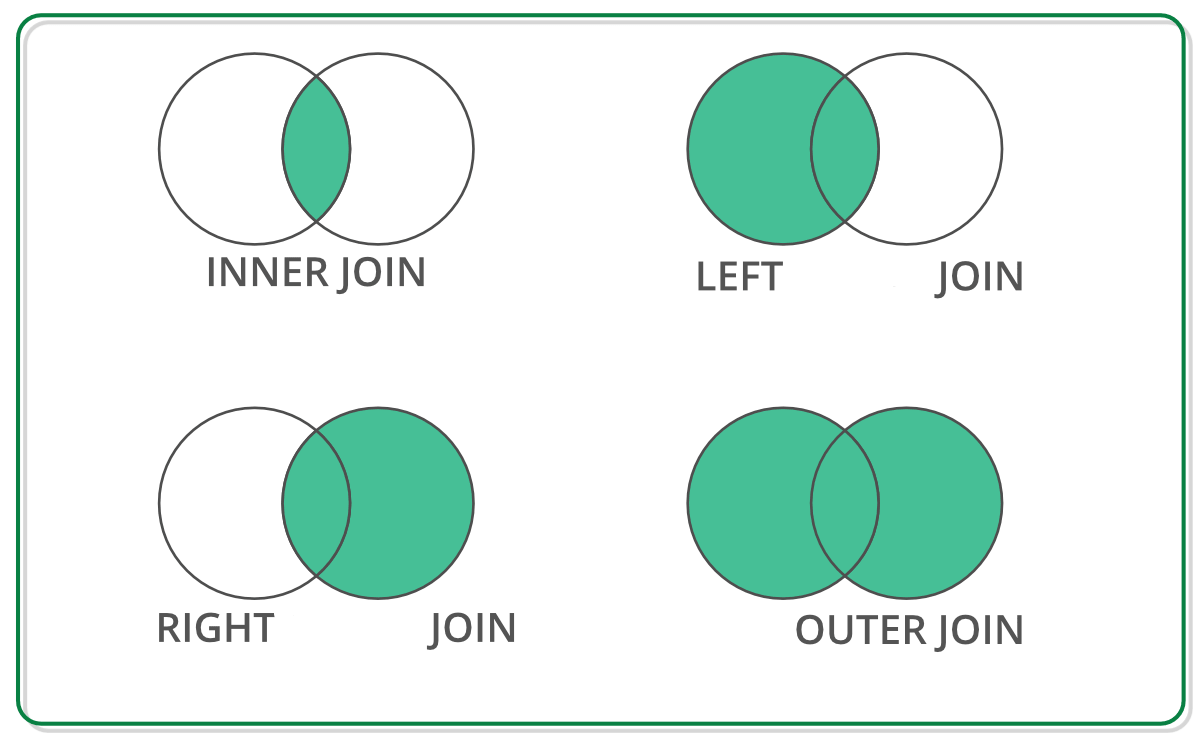

In [138]:
pd.merge(df1,df2, how='outer')

,employee,group,hire_date
0,Bob,Accounting,2008.0
1,Jake,Engineering,2012.0
2,Lisa,Engineering,2004.0
3,Sue,HR,2014.0
4,Ann,HR,NaN
5,Mike,NaN,2003.0


In [139]:
pd.merge(df1, df2, how='inner')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Vamos a usar el DF de trips para a cada registro agregarle la lat/lng, usando el dato de station recordemos que en trips, esta información está en `start_station` pero en stations, la columna que corresponde es `id`.

In [140]:
finalData

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,payment
0,8,0.150000,2011-07-28 10:12:00.040,23,2011-07-28 10:12:00.040,23,B00468,Registered,97217,1976.0,Male,0.0
1,9,3.666667,2011-07-28 10:21:00.040,23,2011-07-28 10:25:00.040,23,B00554,Registered,02215,1966.0,Male,0.0
2,10,0.933333,2011-07-28 10:33:00.040,23,2011-07-28 10:34:00.040,23,B00456,Registered,02108,1943.0,Male,0.0
3,11,1.066667,2011-07-28 10:35:00.040,23,2011-07-28 10:36:00.040,23,B00554,Registered,02116,1981.0,Female,0.0
4,12,0.200000,2011-07-28 10:37:00.040,23,2011-07-28 10:37:00.040,23,B00554,Registered,97214,1983.0,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46,2012-10-01 20:32:00.040,67,B00486,Casual,NaN,NaN,NaN,0.0
552069,623508,3.766667,2012-10-01 20:24:00.040,25,2012-10-01 20:28:00.040,26,B00170,Registered,02118,1986.0,Male,0.0
552070,623509,8.916667,2012-10-01 20:25:00.040,16,2012-10-01 20:34:00.040,47,T01067,Registered,02113,1965.0,Male,0.0
552071,623512,7.150000,2012-10-01 20:29:00.040,61,2012-10-01 20:36:00.040,33,B00621,Registered,02135,1986.0,Male,0.0


In [141]:
dataStations

,id,name,lat,lng
0,3,Colleges of the Fenway,42.340021,-71.100812
1,4,Tremont St. at Berkeley St.,42.345392,-71.069616
2,5,Northeastern U / North Parking Lot,42.341814,-71.090179
3,6,Cambridge St. at Joy St.,42.361285,-71.065140
4,7,Fan Pier,42.353412,-71.044624
...,...,...,...,...
90,94,Charlestown - Main St at Austin St,42.375603,-71.064608
91,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445
92,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075
93,97,Harvard University River Houses at DeWolfe St...,42.369182,-71.117152


In [153]:
tmp = pd.merge(finalData,dataStations, left_on='start_station', right_on='id')
tmp[tmp['id_x']==621802]

,id_x,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,payment,id_y,name,lat,lng
551606,621802,5.616667,2012-10-01 14:01:00.040,95,2012-10-01 14:06:00.040,80,B00634,Registered,02139,1982.0,Male,0.0,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445


In [154]:
tmp = pd.merge(finalData,dataStations, left_on='end_station', right_on='id')
tmp[tmp['id_x']==621802]

,id_x,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,payment,id_y,name,lat,lng
542241,621802,5.616667,2012-10-01 14:01:00.040,95,2012-10-01 14:06:00.040,80,B00634,Registered,02139,1982.0,Male,0.0,80,MIT Stata Center at Vassar St / Main St,42.362429,-71.090188


lo que hizo fue "pegar" las columnas correspondientes a cada station como columnas adicionales de trip, por lo que podemos usar las columnas lat y lng de la estación de inicio.  Hagamoslo nuevamente con la estación de termino.

In [156]:
tmp = pd.merge(finalData,dataStations, left_on='start_station', right_on='id')

In [159]:
finalDataCoords = pd.merge(tmp, dataStations, left_on='end_station', right_on='id' )

In [166]:
finalDataCoords.iloc[1059]

id_x                                                     149096
duration                                               6.766667
start_date                           2011-11-17 13:46:00.050000
start_station                                                40
end_date                             2011-11-17 13:52:00.050000
end_station                                                  23
bike_nr                                                  B00295
subscription_type                                    Registered
zip_code                                                  02124
birth_date                                               1951.0
gender                                                     Male
payment                                                     0.0
id_y                                                         40
name_x                              Lewis Wharf - Atlantic Ave.
lat_x                                                 42.363871
lng_x                                   

Calculemos la distancia entre dos puntos.

In [167]:
from math import sin, cos, sqrt, atan2, radians

def computeDistance(lat_x, lon_x, lat_y, lon_y):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_x)
    lon1 = radians(lon_x)
    lat2 = radians(lat_y)
    lon2 = radians(lon_y)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance


In [168]:
computeDistance(52.2296756,21.0122287,52.406374, 16.9251681)

278.54558935106695

In [172]:
from math import sin, cos, sqrt, atan2, radians

def computeDistanceDF(x):
    # approximate radius of earth in km
    R = 6373.0
    lat_x = x['lat_x']
    lon_x = x['lng_x']
    lat_y = x['lat_y']
    lon_y = x['lng_y']

    lat1 = radians(lat_x)
    lon1 = radians(lon_x)
    lat2 = radians(lat_y)
    lon2 = radians(lon_y)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance



In [175]:
finalDataCoords['distance'] = finalDataCoords.apply(computeDistanceDF, axis=1)

In [176]:
finalDataCoords

,id_x,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,...,payment,id_y,name_x,lat_x,lng_x,id,name_y,lat_y,lng_y,distance
0,8,0.150000,2011-07-28 10:12:00.040,23,2011-07-28 10:12:00.040,23,B00468,Registered,97217,1976.0,...,0.0,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,0.000000
1,9,3.666667,2011-07-28 10:21:00.040,23,2011-07-28 10:25:00.040,23,B00554,Registered,02215,1966.0,...,0.0,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,0.000000
2,10,0.933333,2011-07-28 10:33:00.040,23,2011-07-28 10:34:00.040,23,B00456,Registered,02108,1943.0,...,0.0,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,0.000000
3,11,1.066667,2011-07-28 10:35:00.040,23,2011-07-28 10:36:00.040,23,B00554,Registered,02116,1981.0,...,0.0,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,0.000000
4,12,0.200000,2011-07-28 10:37:00.040,23,2011-07-28 10:37:00.040,23,B00554,Registered,97214,1983.0,...,0.0,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551606,585381,7.883333,2012-09-19 11:08:00.040,96,2012-09-19 11:16:00.040,89,B00335,Casual,NaN,NaN,...,0.0,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,0.961065
551607,593276,6.500000,2012-09-21 15:17:00.040,96,2012-09-21 15:24:00.040,89,T01078,Casual,NaN,NaN,...,0.0,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,0.961065
551608,602506,5.916667,2012-09-24 10:42:00.040,96,2012-09-24 10:48:00.040,89,B00402,Casual,NaN,NaN,...,0.0,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,0.961065
551609,570885,11.183333,2012-09-14 20:30:00.040,95,2012-09-14 20:41:00.040,89,B00640,Registered,02143,1985.0,...,0.0,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,2.200465


In [179]:
from matplotlib.pyplot import plot

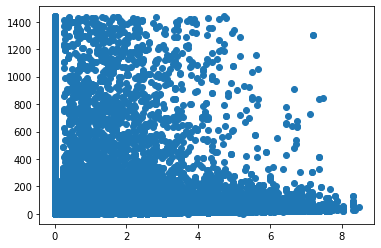

In [180]:
plot(finalDataCoords['distance'],finalDataCoords['duration'],'o')

Otra forma de usar la función original (sin dataframes) es usar una `lambda` function.

In [182]:
finalDataCoords.apply(lambda x : computeDistance(x['lat_x'],x['lng_x'],x['lat_y'],x['lng_y']), axis=1)

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
551606    0.961065
551607    0.961065
551608    0.961065
551609    2.200465
551610    2.200465
Length: 551611, dtype: float64

Y calculemos las distancias recorridas por cada bicicleta

In [184]:
finalDataCoords.groupby('bike_nr')['distance'].sum().sort_values()

bike_nr
T01168       0.000000
T01380       6.660330
T01016      14.321797
T01093      23.244400
T01064      23.621586
             ...     
B00444    1710.222498
B00114    1733.186912
B00401    1742.830206
B00490    1747.224324
B00563    1767.688107
Name: distance, Length: 885, dtype: float64

In [185]:
finalData['bike_nr']

0         B00468
1         B00554
2         B00456
3         B00554
4         B00554
           ...  
552068    B00486
552069    B00170
552070    T01067
552071    B00621
552072    B00012
Name: bike_nr, Length: 551611, dtype: category
Categories (885, object): ['? (0x241EC230)', '? (0x67D8478F)', '? (0xA533D104)', 'B00001', ..., 'T01053', 'T01093', 'T01168', 'T01380']

In [187]:
finalDataCoords.groupby(['bike_nr','start_station'])['distance'].mean()

bike_nr         start_station
? (0x241EC230)  10               0.964519
                11               2.124605
                12               2.961844
                13               2.004517
                14               1.855257
                                   ...   
T01380          94                    NaN
                95                    NaN
                96                    NaN
                97                    NaN
                98                    NaN
Name: distance, Length: 84075, dtype: float64

## Tablas Pivotes
Una herramienta muy común en algunos softwares de datos (incluyendo Excel) son las tablas pivotes.  Pandas incluye un propio comando para esto.

Agreguemos un par de columnas, como el viaje de cada mes o el dia de la semana

In [188]:
finalData['month']=finalData['start_date'].dt.month
finalData['day']=finalData['start_date'].dt.day_name()

<ipython-input-188-7770d18f8ed3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['month']=finalData['start_date'].dt.month
<ipython-input-188-7770d18f8ed3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['day']=finalData['start_date'].dt.day_name()


In [189]:
finalData

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,payment,month,day
0,8,0.150000,2011-07-28 10:12:00.040,23,2011-07-28 10:12:00.040,23,B00468,Registered,97217,1976.0,Male,0.0,7,Thursday
1,9,3.666667,2011-07-28 10:21:00.040,23,2011-07-28 10:25:00.040,23,B00554,Registered,02215,1966.0,Male,0.0,7,Thursday
2,10,0.933333,2011-07-28 10:33:00.040,23,2011-07-28 10:34:00.040,23,B00456,Registered,02108,1943.0,Male,0.0,7,Thursday
3,11,1.066667,2011-07-28 10:35:00.040,23,2011-07-28 10:36:00.040,23,B00554,Registered,02116,1981.0,Female,0.0,7,Thursday
4,12,0.200000,2011-07-28 10:37:00.040,23,2011-07-28 10:37:00.040,23,B00554,Registered,97214,1983.0,Female,0.0,7,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46,2012-10-01 20:32:00.040,67,B00486,Casual,NaN,NaN,NaN,0.0,10,Monday
552069,623508,3.766667,2012-10-01 20:24:00.040,25,2012-10-01 20:28:00.040,26,B00170,Registered,02118,1986.0,Male,0.0,10,Monday
552070,623509,8.916667,2012-10-01 20:25:00.040,16,2012-10-01 20:34:00.040,47,T01067,Registered,02113,1965.0,Male,0.0,10,Monday
552071,623512,7.150000,2012-10-01 20:29:00.040,61,2012-10-01 20:36:00.040,33,B00621,Registered,02135,1986.0,Male,0.0,10,Monday


Podemos agrupar por mas de una columna, por ejemplo, la duración promedio de los viajes por cada dia de la semana los distintos meses.


In [190]:
finalData.groupby(['month','day'])['duration'].mean()

month  day      
3      Friday       19.545181
       Monday       17.236796
       Saturday     27.604671
       Sunday       35.256211
       Thursday     16.415541
                      ...    
11     Saturday     31.242051
       Sunday       42.704608
       Thursday     15.774854
       Tuesday      14.522431
       Wednesday    16.158131
Name: duration, Length: 63, dtype: float64

Un forma mas efectiva de visualizar esto es en una tabla, esto se llama una tabla pivote.  Donde decido que son las fila `index`, las columnas `columns` y los valores a desplegar `values` así como el *agregador* a aplicar a cada dato `aggfunc`. 

In [191]:
finalData.pivot_table(values='duration', columns='month', index='day', aggfunc='mean')

month,3,4,5,6,7,8,9,10,11
day,,,,,,,,,
Friday,19.545181,16.820292,15.464950,15.666985,17.240976,22.937421,20.721785,23.349817,18.109054
Monday,17.236796,18.137857,18.692415,14.263635,16.399548,21.783316,21.351371,22.025409,16.299021
Saturday,27.604671,26.355502,27.477282,24.149847,29.738141,35.570739,29.044474,43.287357,31.242051
Sunday,35.256211,25.138158,28.333665,26.782958,28.903865,31.176206,30.437344,47.896037,42.704608
Thursday,16.415541,13.436867,14.504003,14.660568,16.536273,20.718764,15.386106,18.068377,15.774854
Tuesday,15.587873,15.635472,12.129703,13.642497,16.119691,21.361825,17.831251,19.350771,14.522431
Wednesday,16.231925,13.055404,13.101969,13.338051,20.309822,21.869728,16.645311,17.930382,16.158131


In [192]:
finalData.pivot_table(values=['duration','birth_date'], columns='subscription_type', index='month', aggfunc=['mean', 'count'])

mean                            count             \
                    birth_date   duration            birth_date              
subscription_type   Registered     Casual Registered     Casual Registered   
month                                                                        
3                  1976.303260  45.063842  11.206018          0      10275   
4                  1976.244984  36.188459  11.149880          0      31247   
5                  1976.230049  34.640274  11.034746          0      36075   
6                  1976.204013  32.213688  11.140130          0      39272   
7                  1976.124669  35.532269  11.686938          0      46138   
8                  1976.211597  41.005865  12.453465          0      69793   
9                  1977.003398  38.658436  11.822884          0      76812   
10                 1975.803002  57.553389  12.737517          0      25381   
11                 1975.118448  47.556765  11.062853          0      17856   

                                       
                  duration             
subscription_type   Casual Registered  
month                                  
3                     4066      10366  
4                    12958      31502  
5                    17376      36405  
6                    16353      39611  
7                    26739      46454  
8                    51704      70175  
9                    46200      77271  
10                   13656      25682  
11                    6992      18101

In [201]:
finalData.groupby(['month','subscription_type'])[['duration','birth_date']].agg(['mean', 'count'])

duration          birth_date       
                              mean  count         mean  count
month subscription_type                                      
3     Casual             45.063842   4066          NaN      0
      Registered         11.206018  10366  1976.303260  10275
4     Casual             36.188459  12958          NaN      0
      Registered         11.149880  31502  1976.244984  31247
5     Casual             34.640274  17376          NaN      0
      Registered         11.034746  36405  1976.230049  36075
6     Casual             32.213688  16353          NaN      0
      Registered         11.140130  39611  1976.204013  39272
7     Casual             35.532269  26739          NaN      0
      Registered         11.686938  46454  1976.124669  46138
8     Casual             41.005865  51704          NaN      0
      Registered         12.453465  70175  1976.211597  69793
9     Casual             38.658436  46200          NaN      0
      Registered         11.822884  77271  1977.003398  76812
10    Casual             57.553389  13656          NaN      0
      Registered         12.737517  25682  1975.803002  25381
11    Casual             47.556765   6992          NaN      0
      Registered         11.062853  18101  1975.118448  17856

Instalar 
- plotnine
- geopandas
